**Практический кейс-анализ рекламных данных**

In [25]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

%matplotlib inline


In [26]:
ads_data = pd.read_csv('ads_data.csv.zip', compression='zip')

In [27]:
ads_data

,ad_id,time,event,date,ad_cost_type,has_video,client_union_id,campaign_union_id,platform,ad_cost,target_audience_count,user_id
0,23456,1554076848,view,2019-04-01,CPM,0,5681,23456,android,190.0,125560,793
1,111941,1554135866,view,2019-04-01,CPM,0,111793,111941,ios,215.2,32277,1041
2,111941,1554135866,view,2019-04-01,CPM,0,111793,111941,ios,215.2,32277,41
3,42987,1554135866,view,2019-04-01,CPM,0,28541,42985,ios,199.1,80160,898
4,23456,1554135866,view,2019-04-01,CPM,0,5681,23456,web,190.0,125560,29
...,...,...,...,...,...,...,...,...,...,...,...,...
3176709,112583,1554501092,view,2019-04-06,CPM,0,111818,112260,android,199.4,239408,5467
3176710,112583,1554501092,view,2019-04-06,CPM,0,111818,112260,android,199.4,239408,2508
3176711,112583,1554501092,click,2019-04-06,CPM,0,111818,112260,web,199.4,239408,7896
3176712,112583,1554501092,view,2019-04-06,CPM,0,111818,112260,ios,199.4,239408,4319


In [28]:
ads_data.columns

Index(['ad_id', 'time', 'event', 'date', 'ad_cost_type', 'has_video',
       'client_union_id', 'campaign_union_id', 'platform', 'ad_cost',
       'target_audience_count', 'user_id'],
      dtype='object')

Экскурс в рекламную терминологию на счет 3...2...1

Наши данные - это логи - > показывают как реклама показывается на нашей платформе.

**ad_id** - id рекламного объявления

**time** - время, когда с объявлением случилось какое то событие

**event** - само событие ( либо view либо click)

**date** - дата события

**ad_cost_type** - (CPM/CPC) - это реклама, которая закупается за просмотры ( когда рекламодатель платит за 1000 просмотров) - CPM, или когда рекламодатель платит за клик (CPC)

**has_video**  - было ли у рекламного объявления видео или нет

**client_union_id / campaign_union_id** - какой клиент в какой рекламной компании это объявление размещал 

**platform** - на какой платформе был показ объявления

**ad_cost** - стоимость рекламного взаимодействия ( для объ-ий с CPM - стоимость 1000 показов, для CPC - стоимость 100 кликов)

**target_audience_count** - на какую аудиторию таргетировались эти объявления  (одни рекламодатели на всю Россию, другие на 1000 человек и.т.п.)

**user_id** - пользователи, которым реклама показалась 

Список задач:

- Получить статистику по дням. Просто посчитать число всех событий по дням, число показов, число кликов, число уникальных объявлений и уникальных кампаний.Разобраться, почему случился такой скачок 2019-04-05? Каких событий стало больше? У всех объявлений или только у некоторых?


- Найти топ 10 объявлений по CTR за все время. CTR — это отношение всех просмотров объявления к кликам. Например, если у объявления было 100 показов и 2 клика, CTR = 0.02. Различается ли средний и медианный CTR объявлений в наших данных?


- Похоже, в наших логах есть баг, объявления приходят с кликами, но без показов! Сколько таких объявлений, есть ли какие-то закономерности? Эта проблема наблюдается на всех платформах?


- Есть ли различия в CTR у объявлений с видео и без? А чему равняется 95 процентиль CTR по всем объявлениям за 2019-04-04?


- Для финансового отчета нужно рассчитать наш заработок по дням. В какой день мы заработали больше всего? В какой меньше? Мы списываем с клиентов деньги, если произошел клик по CPC объявлению, и мы списываем деньги за каждый показ CPM объявления, если у CPM объявления цена - 200 рублей, то за один показ мы зарабатываем 200 / 1000.


- Какая платформа самая популярная для размещения рекламных объявлений? Сколько процентов показов приходится на каждую из платформ (колонка platform)?


- А есть ли такие объявления, по которым сначала произошел клик, а только потом показ?

Предобработка и разведывательный анализ данных.

In [29]:
ads_data.head(7)

,ad_id,time,event,date,ad_cost_type,has_video,client_union_id,campaign_union_id,platform,ad_cost,target_audience_count,user_id
0,23456,1554076848,view,2019-04-01,CPM,0,5681,23456,android,190.0,125560,793
1,111941,1554135866,view,2019-04-01,CPM,0,111793,111941,ios,215.2,32277,1041
2,111941,1554135866,view,2019-04-01,CPM,0,111793,111941,ios,215.2,32277,41
3,42987,1554135866,view,2019-04-01,CPM,0,28541,42985,ios,199.1,80160,898
4,23456,1554135866,view,2019-04-01,CPM,0,5681,23456,web,190.0,125560,29
5,4585,1554135866,view,2019-04-01,CPC,0,37,4382,ios,53.5,327648,647
6,4585,1554135866,view,2019-04-01,CPC,0,37,4382,ios,53.5,327648,119


In [30]:
ads_data.dtypes

ad_id                      int64
time                       int64
event                     object
date                      object
ad_cost_type              object
has_video                  int64
client_union_id            int64
campaign_union_id          int64
platform                  object
ad_cost                  float64
target_audience_count      int64
user_id                    int64
dtype: object

In [31]:
#Сейчас в колонке time лежит целое число ( например 1554076848). Для работы со временем лучше использовать timestamp
#можно легко посчитать сколько секунд прошло между 2-мя промежутками
1554135866 - 1554076848 
#преобразуем тип данных

59018

In [32]:
ads_data['full_date'] = pd.to_datetime(ads_data.time, unit='s')
ads_data.head(5)

,ad_id,time,event,date,ad_cost_type,has_video,client_union_id,campaign_union_id,platform,ad_cost,target_audience_count,user_id,full_date
0,23456,1554076848,view,2019-04-01,CPM,0,5681,23456,android,190.0,125560,793,2019-04-01 00:00:48
1,111941,1554135866,view,2019-04-01,CPM,0,111793,111941,ios,215.2,32277,1041,2019-04-01 16:24:26
2,111941,1554135866,view,2019-04-01,CPM,0,111793,111941,ios,215.2,32277,41,2019-04-01 16:24:26
3,42987,1554135866,view,2019-04-01,CPM,0,28541,42985,ios,199.1,80160,898,2019-04-01 16:24:26
4,23456,1554135866,view,2019-04-01,CPM,0,5681,23456,web,190.0,125560,29,2019-04-01 16:24:26


In [33]:
ads_data.shape

(3176714, 13)

In [34]:
ads_data.dtypes

ad_id                             int64
time                              int64
event                            object
date                             object
ad_cost_type                     object
has_video                         int64
client_union_id                   int64
campaign_union_id                 int64
platform                         object
ad_cost                         float64
target_audience_count             int64
user_id                           int64
full_date                datetime64[ns]
dtype: object

In [35]:
ads_data['date'] = pd.to_datetime(ads_data.date)

In [36]:
ads_data.dtypes

ad_id                             int64
time                              int64
event                            object
date                     datetime64[ns]
ad_cost_type                     object
has_video                         int64
client_union_id                   int64
campaign_union_id                 int64
platform                         object
ad_cost                         float64
target_audience_count             int64
user_id                           int64
full_date                datetime64[ns]
dtype: object

In [37]:
#посмотрим какой хранится день/месяц/полная дата
ads_data.full_date.dt.day

0          1
1          1
2          1
3          1
4          1
          ..
3176709    5
3176710    5
3176711    5
3176712    5
3176713    5
Name: full_date, Length: 3176714, dtype: int64

In [38]:
ads_data.full_date.dt.month

0          4
1          4
2          4
3          4
4          4
          ..
3176709    4
3176710    4
3176711    4
3176712    4
3176713    4
Name: full_date, Length: 3176714, dtype: int64

In [39]:
ads_data.full_date.dt.date

0          2019-04-01
1          2019-04-01
2          2019-04-01
3          2019-04-01
4          2019-04-01
              ...    
3176709    2019-04-05
3176710    2019-04-05
3176711    2019-04-05
3176712    2019-04-05
3176713    2019-04-05
Name: full_date, Length: 3176714, dtype: object

- Получить статистику по дням. Просто посчитать число всех событий по дням, число показов, число кликов, число уникальных объявлений и уникальных кампаний.Разобраться, почему случился такой скачок 2019-04-05? Каких событий стало больше? У всех объявлений или только у некоторых?

In [40]:
count_event_by_day = ads_data \
        .groupby('date') \
        .agg({'ad_id':'count'}) \
        .rename(columns={'ad_id':'count_events'})
count_event_by_day

,count_events
date,
2019-04-01,35567
2019-04-02,147329
2019-04-03,216529
2019-04-04,127699
2019-04-05,2284883
2019-04-06,364707


<AxesSubplot: xlabel='date'>

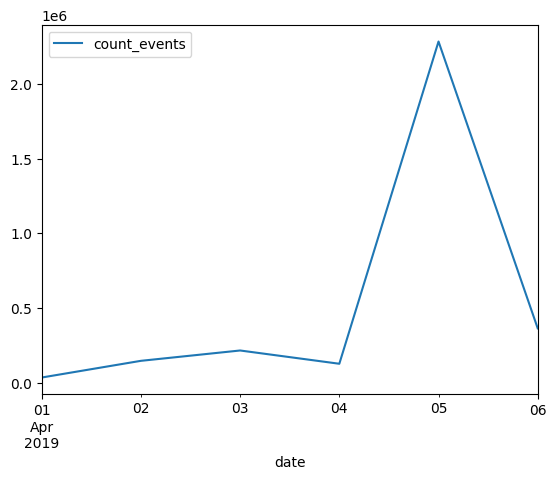

In [41]:
count_event_by_day.plot()

На графике ярче видно, что 05 числа произошёл сильный скачок количества событий. Сразу возникают вопросы...Что случилось? Каких событий стало больше? У всех объявлений или некоторых?

Теперь посчитаем количество просмотров и кликов по этим дням.



In [42]:
count_views_and_clicks_by_day = ads_data \
                                .groupby(['date', 'event'], as_index=False) \
                                .agg({'ad_id':'count'}) 
count_views_and_clicks_by_day

,date,event,ad_id
0,2019-04-01,click,735
1,2019-04-01,view,34832
2,2019-04-02,click,1518
3,2019-04-02,view,145811
4,2019-04-03,click,1678
5,2019-04-03,view,214851
6,2019-04-04,click,1517
7,2019-04-04,view,126182
8,2019-04-05,click,501595
9,2019-04-05,view,1783288


Такая форма записи воспринимается тяжело. Поэтому воспользуемся функцией pivot:

pivot table - мы изменяем нашу структуру данных( чтобы кликии и просмотры стали колонками, а значения их кол-во по определенным дням)

In [43]:
count_views_and_clicks_by_day = ads_data \
                                .groupby(['date', 'event'], as_index=False) \
                                .agg({'ad_id':'count'}) \
                                .pivot(index='date', columns = 'event', values='ad_id') \
                                .reset_index() #для избавления от мультииндексов
count_views_and_clicks_by_day

event,date,click,view
0,2019-04-01,735,34832
1,2019-04-02,1518,145811
2,2019-04-03,1678,214851
3,2019-04-04,1517,126182
4,2019-04-05,501595,1783288
5,2019-04-06,80420,284287


Можно заметить, что кликов сильно меньше чем просмотров ( далеко не все пользователи, которые смотрят рекламу, тыкают по ней). Также заметен большой скачок 5 числа как для просмотров так и для кликов.

Теперь посмотрим количество уникальных объявлений по дням.

In [44]:
count_unique_ad = ads_data \
                                        .groupby('date') \
                                        .agg({'ad_id': lambda x: x.nunique()}) \
                                        .rename(columns={'ad_id':'count_unique_ad_id'})
count_unique_ad

,count_unique_ad_id
date,
2019-04-01,49
2019-04-02,146
2019-04-03,179
2019-04-04,150
2019-04-05,131
2019-04-06,61


<AxesSubplot: xlabel='date'>

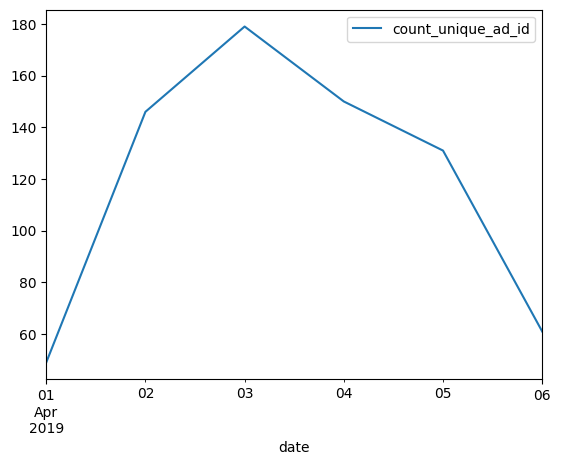

In [45]:
count_unique_ad.plot()

Наибольшее количество уникальных объявлений наблюдается 2019-04-03.

Посмотрим количество уникальных компаний по дням.

In [46]:
count_unique_companies = ads_data \
                                        .groupby('date') \
                                        .agg({'campaign_union_id': lambda x: x.nunique()}) \
                                        .rename(columns={'campaign_union_id':'count_unique_camp'})
count_unique_companies

,count_unique_camp
date,
2019-04-01,49
2019-04-02,146
2019-04-03,177
2019-04-04,147
2019-04-05,130
2019-04-06,60


<AxesSubplot: xlabel='date'>

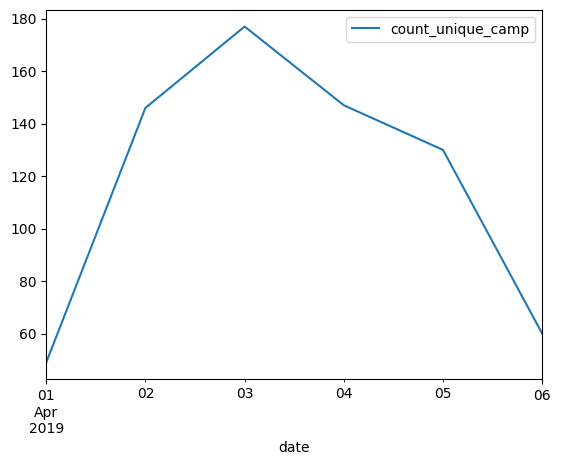

In [47]:
count_unique_companies.plot()

Наибольшее количество уникальных компаний наблюдается 2019-04-03.

Теперь вернемся к скачку 2019-04-05 и разберемся в чем его причина.

У нас в один из дней очень сильно увеличилась реклама. По какой причине?

Например, какой - то особенный день ( черная пятница ) - > Все рекламодатели решили закинуть больше рекламы.
Или пришёл какой - то крупный рекламодатель и только он начал крутить больше рекламы. Эти гипотезы имеют место на существование, но нужно самим посмотреть что происходит в конкретно этот день.




In [48]:
ads_data[ads_data.date == '2019-04-05'] \
        .groupby('ad_id', as_index=False) \
        .agg({'time': 'count'}) \
        .sort_values('time', ascending=False) \
        .rename(columns={'time':'count_ad'}) \
        .head(5)

,ad_id,count_ad
108,112583,2166611
27,29927,27186
65,44635,8268
81,46583,7327
66,44956,5656


Исходя из полученных результатов, у ad_id == 112583 событий на порядок больше чем у конкурентов. 

In [49]:
max_id = 112583
ads_data.query('ad_id == @max_id') \
        .groupby('date') \
        .agg({'time': 'count'}) 

,time
date,
2019-04-05,2166611
2019-04-06,348613


Можем заметить, что это объявление крутилось всего 2 дня и 5 числа забрало на себя довольно большую часть событий.

Посмотрим что это за объявление ( что за компания / клиент )

In [50]:
ads_data.query('ad_id == @max_id').head(1)

,ad_id,time,event,date,ad_cost_type,has_video,client_union_id,campaign_union_id,platform,ad_cost,target_audience_count,user_id,full_date
527124,112583,1554480636,view,2019-04-05,CPM,0,111818,112260,web,199.4,239408,4355,2019-04-05 16:10:36


Это компания campaign_union_id == 112260, клиент client_union_id == 111818.

- Найдем топ 10 объявлений по CTR за все время. CTR — это отношение всех просмотров объявления к кликам. Например, если у объявления было 100 показов и 2 клика, CTR = 0.02. Различается ли средний и медианный CTR объявлений в наших данных?

CTR = клики / показы

In [51]:
data_ad = ads_data \
        .groupby(['ad_id', 'event'], as_index=False) \
        .agg({'time':'count'}) \
        .pivot(index='ad_id', columns = 'event', values='time') \
        .reset_index() #для избавления от мультииндексов
data_ad

event,ad_id,click,view
0,3,9.0,490.0
1,2132,1.0,95.0
2,2276,2.0,1454.0
3,2475,NaN,132.0
4,2643,3.0,286.0
...,...,...,...
350,121941,1.0,640.0
351,121943,15.0,1722.0
352,122042,1.0,155.0
353,122063,1.0,260.0


In [52]:
#добавление новой колонки (нескольких)
data_ad = data_ad.assign(ctr = data_ad.click / data_ad.view, ctr_per = 100* data_ad.click / data_ad.view)
data_ad

event,ad_id,click,view,ctr,ctr_per
0,3,9.0,490.0,0.018367,1.836735
1,2132,1.0,95.0,0.010526,1.052632
2,2276,2.0,1454.0,0.001376,0.137552
3,2475,NaN,132.0,NaN,NaN
4,2643,3.0,286.0,0.010490,1.048951
...,...,...,...,...,...
350,121941,1.0,640.0,0.001563,0.156250
351,121943,15.0,1722.0,0.008711,0.871080
352,122042,1.0,155.0,0.006452,0.645161
353,122063,1.0,260.0,0.003846,0.384615


In [53]:
data_ad.sort_values('ctr', ascending=False).head(10)

event,ad_id,click,view,ctr,ctr_per
289,112583,580436.0,1934788.0,0.300000,29.999979
324,119450,258.0,1254.0,0.205742,20.574163
125,38575,43.0,257.0,0.167315,16.731518
144,40968,29.0,217.0,0.133641,13.364055
207,45642,42.0,344.0,0.122093,12.209302
283,110924,11.0,95.0,0.115789,11.578947
194,45043,28.0,245.0,0.114286,11.428571
96,35034,112.0,997.0,0.112337,11.233701
5,4585,53.0,476.0,0.111345,11.134454
328,120347,236.0,2168.0,0.108856,10.885609


In [54]:
data_ad.ctr.describe()

count    306.000000
mean       0.020628
std        0.030360
min        0.000451
25%        0.005943
50%        0.010753
75%        0.024072
max        0.300000
Name: ctr, dtype: float64

In [55]:
data_ad.ctr.mean() == data_ad.ctr.median()

False

Следовательно, средний и медианный CTR объявлений различается.

Посмотрим на CTR по всем нашим объявлениям, а для этого построим график.



<AxesSubplot: xlabel='ctr', ylabel='Count'>

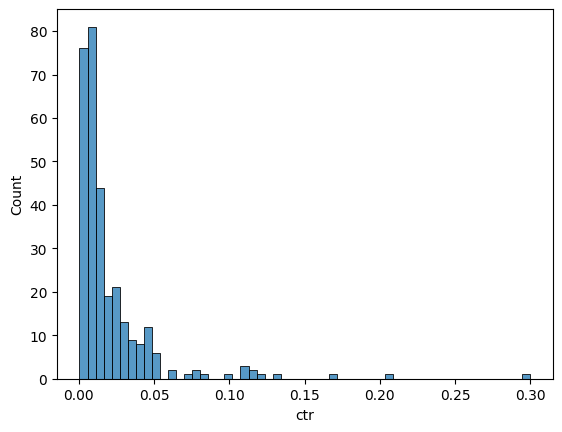

In [56]:
sns.histplot(data_ad.ctr)

Много объявлений у которых CTR небольшой, а объявлений с высоким CTR всё меньше и меньше. 

Возникают проблемы с такого вида данными: 

1) Такие данные тяжело охарактерирозовать каким - то одним числом ( та же проблема что и с размером зарплаты по стране - это число редко отображает реальное положение дел )  - > Среднее по CTR брать плохо - лучше медиану(находится по середине распределения) - это более точная оценка!




- Похоже, в наших логах есть баг, объявления приходят с кликами, но без показов! Сколько таких объявлений, есть ли какие-то закономерности? Эта проблема наблюдается на всех платформах?

Перед кликом всегда следует показ - > число показов должно быть больше или равно числа кликов. ( если это не так, то есть баги )

In [57]:
#.fillna(0) - заполняет пропуски 0
data_ad = data_ad.fillna(0)
data_ad

event,ad_id,click,view,ctr,ctr_per
0,3,9.0,490.0,0.018367,1.836735
1,2132,1.0,95.0,0.010526,1.052632
2,2276,2.0,1454.0,0.001376,0.137552
3,2475,0.0,132.0,0.000000,0.000000
4,2643,3.0,286.0,0.010490,1.048951
...,...,...,...,...,...
350,121941,1.0,640.0,0.001563,0.156250
351,121943,15.0,1722.0,0.008711,0.871080
352,122042,1.0,155.0,0.006452,0.645161
353,122063,1.0,260.0,0.003846,0.384615


Посмотрим на те объявления, у которых количество кликов равняется 0.


In [58]:
data_ad.query('click == 0').head(5)

event,ad_id,click,view,ctr,ctr_per
3,2475,0.0,132.0,0.0,0.0
26,16444,0.0,169.0,0.0,0.0
29,16678,0.0,317.0,0.0,0.0
30,16845,0.0,834.0,0.0,0.0
38,20871,0.0,338.0,0.0,0.0


In [59]:
data_ad.query('click == 0').shape

(40, 5)

Всего 40 объявлений без кликов.

In [60]:
id_bugs = data_ad.query('click == 0').ad_id

В исходных данных отберем только нужные нам ( id с 0 кликами).

In [61]:
ads_bugs = ads_data[ads_data.ad_id.isin(id_bugs)]
ads_bugs.head(5)

,ad_id,time,event,date,ad_cost_type,has_video,client_union_id,campaign_union_id,platform,ad_cost,target_audience_count,user_id,full_date
38,109397,1554135907,view,2019-04-01,CPC,0,109255,109393,android,50.1,107796,196,2019-04-01 16:25:07
40,33802,1554135907,view,2019-04-01,CPM,0,21845,33802,ios,195.4,6952,474,2019-04-01 16:25:07
64,23108,1554135901,view,2019-04-01,CPC,0,5345,23108,ios,48.2,775393,107,2019-04-01 16:25:01
65,23108,1554135901,view,2019-04-01,CPC,0,5345,23108,ios,48.2,775393,245,2019-04-01 16:25:01
77,44546,1554135731,view,2019-04-01,CPM,0,32804,44546,android,202.7,18766,282,2019-04-01 16:22:11


In [62]:
ads_bugs.shape

(9969, 13)

In [63]:
ads_bugs_on_platforms = ads_bugs \
        .groupby('platform', as_index=False) \
        .agg({'ad_id':'count'}) \
        .rename(columns={'ad_id':'count_id'}) \
        .sort_values('count_id', ascending=False)
ads_bugs_on_platforms

,platform,count_id
0,android,4906
1,ios,3075
2,web,1988


<AxesSubplot: xlabel='platform', ylabel='count_id'>

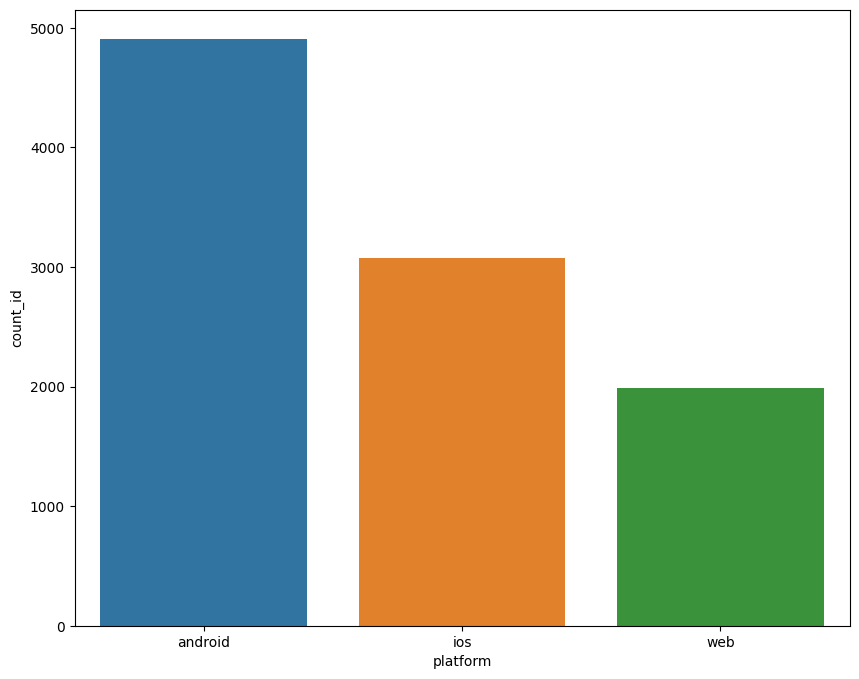

In [64]:
plt.figure(figsize=(10,8))
sns.barplot(ads_bugs_on_platforms, x='platform', y='count_id')

Перед тем чтобы сделать выводы о различии количества на разных платформах из - за бага, нужно понимать какое было исходное соотношение по платформам.

In [65]:
ads_platforms = ads_data \
        .groupby('platform', as_index=False) \
        .agg({'ad_id':'count'}) \
        .rename(columns={'ad_id':'count_id'}) \
        .sort_values('count_id', ascending=False)

<AxesSubplot: xlabel='platform', ylabel='count_id'>

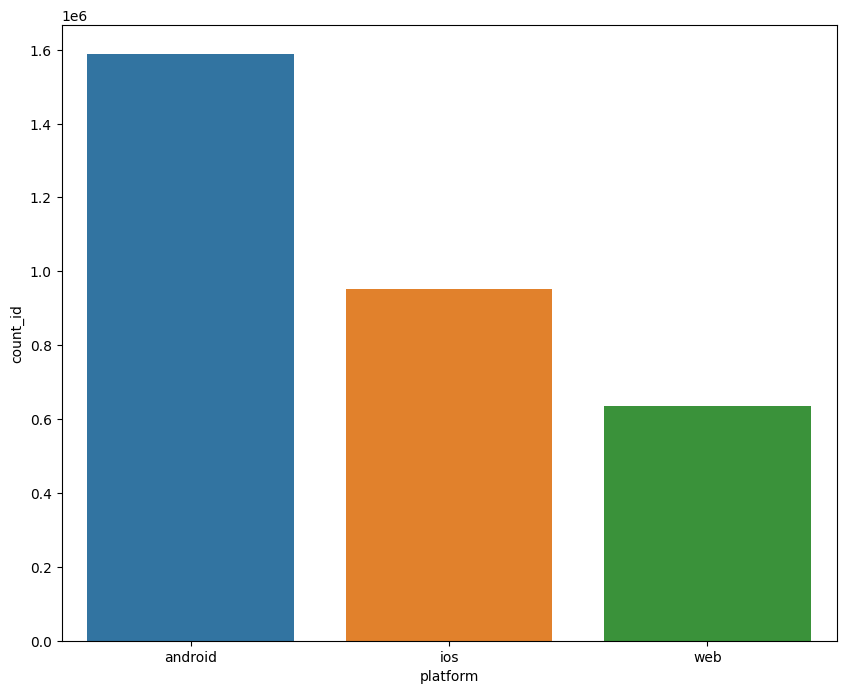

In [66]:
plt.figure(figsize=(10,8))
sns.barplot(ads_platforms, x='platform', y='count_id')

Можно заметить, что андройда изначально было больше чем других платформ. Поэтому баг появляется на андройде не потому что он чаще случается на это платформе, а потому что событий с андройдом в целом больше изначально.

- Есть ли различия в CTR у объявлений с видео и без? А чему равняется 95 процентиль CTR по всем объявлениям за 2019-04-04?

In [67]:
df_2019_04_04 = ads_data[ads_data.date == '2019-04-04'] \
        .groupby(['ad_id', 'event'], as_index=False) \
        .agg({'time':'count'}) \
        .pivot(index='ad_id', columns = 'event', values='time') \
        .fillna(0) \
        .reset_index() #для избавления от мультииндексов
df_2019_04_04

event,ad_id,click,view
0,9071,3.0,352.0
1,9776,37.0,1115.0
2,10601,3.0,848.0
3,11887,151.0,8720.0
4,12137,1.0,170.0
...,...,...,...
145,120790,0.0,19.0
146,121779,68.0,1116.0
147,121790,7.0,701.0
148,121941,0.0,95.0


In [68]:
df_2019_04_04 = df_2019_04_04.assign(ctr = df_2019_04_04.click / df_2019_04_04.view)
df_2019_04_04

event,ad_id,click,view,ctr
0,9071,3.0,352.0,0.008523
1,9776,37.0,1115.0,0.033184
2,10601,3.0,848.0,0.003538
3,11887,151.0,8720.0,0.017317
4,12137,1.0,170.0,0.005882
...,...,...,...,...
145,120790,0.0,19.0,0.000000
146,121779,68.0,1116.0,0.060932
147,121790,7.0,701.0,0.009986
148,121941,0.0,95.0,0.000000


95 перцентиль - значение, которое превышает только 5 % наших наблюдений.

Пример: 95 перцентиль зарплаты = 140.000 р - > 95 % получают меньше чем эта цифра, а 5 % больше.

In [69]:
#Возьмем только те данные, где клики > 0
df_2019_04_04[df_2019_04_04.click > 0].ctr.quantile(q=0.95)

0.10211538461538454

Таким образом, 95 процентиль CTR по всем объявлениям за 2019-04-04 равняется 0.1021

In [70]:
df = ads_data \
        .groupby(['ad_id', 'event'], as_index=False) \
        .agg({'has_video':'sum'}) \
        .reset_index() #для избавления от мультииндексов

In [78]:
df.has_video.describe()

count     661.000000
mean       10.838124
std       150.826801
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      2948.000000
Name: has_video, dtype: float64

In [89]:
df1 = ads_data.query('has_video == 1') \
            .groupby(['date', 'event'], as_index=False) \
            .agg({'ad_id':'count'}) \
            .pivot(index='date', columns = 'event', values='ad_id') \
            .reset_index() #для избавления от мультииндексов
df1 = df1.assign(ctr = df1.click / df1.view, ctr_per = 100* df1.click / df1.view, has_video = [1]*df1.shape[0])
df1 = df1.fillna(0)
df1

event,date,click,view,ctr,ctr_per,has_video
0,2019-04-01,5.0,0.0,0.000000,0.000000,1
1,2019-04-02,5.0,1487.0,0.003362,0.336247,1
2,2019-04-03,2.0,847.0,0.002361,0.236128,1
3,2019-04-04,2.0,110.0,0.018182,1.818182,1
4,2019-04-05,12.0,4053.0,0.002961,0.296077,1
5,2019-04-06,0.0,641.0,0.000000,0.000000,1


In [91]:
df2 = ads_data.query('has_video == 0') \
            .groupby(['date', 'event'], as_index=False) \
            .agg({'ad_id':'count'}) \
            .pivot(index='date', columns = 'event', values='ad_id') \
            .reset_index() #для избавления от мультииндексов
df2 = df2.assign(ctr = df2.click / df2.view, ctr_per = 100* df2.click / df2.view, has_video = [0]*df1.shape[0])
df2

event,date,click,view,ctr,ctr_per,has_video
0,2019-04-01,730,34832,0.020958,2.095774,0
1,2019-04-02,1513,144324,0.010483,1.048336,0
2,2019-04-03,1676,214004,0.007832,0.783163,0
3,2019-04-04,1515,126072,0.012017,1.201694,0
4,2019-04-05,501583,1779235,0.281909,28.190936,0
5,2019-04-06,80420,283646,0.283522,28.352242,0


In [95]:
differences_CTR = ads_data \
            .groupby(['date', 'event'], as_index=False) \
            .agg({'ad_id':'count'}) \
            .pivot(index='date', columns = 'event', values='ad_id') \
            .reset_index() #для избавления от мультииндексов
differences_CTR = differences_CTR.assign(difference_video_yes_and_video_no = df1.ctr - df2.ctr)
differences_CTR

event,date,click,view,difference_video_yes_and_video_no
0,2019-04-01,735,34832,-0.020958
1,2019-04-02,1518,145811,-0.007121
2,2019-04-03,1678,214851,-0.005470
3,2019-04-04,1517,126182,0.006165
4,2019-04-05,501595,1783288,-0.278949
5,2019-04-06,80420,284287,-0.283522


Теперь мы можем посмотреть на таблицу, в которой представлена разница CTR ( группировка по дням) между объявлениями с видео и без видео.

(CTR с видео - CTR без видео) - > Значения в колонке difference_video_yes_and_video_no показывает данное различие. Отрицательное значение говорит о том, что значение CTR для объявлений с видео было меньше в этот день по сравнению со значением CTR без приложенних видео.

- Какая платформа самая популярная для размещения рекламных объявлений? Сколько процентов показов приходится на каждую из платформ (колонка platform)?

In [97]:
ads_data.head(5)

,ad_id,time,event,date,ad_cost_type,has_video,client_union_id,campaign_union_id,platform,ad_cost,target_audience_count,user_id,full_date
0,23456,1554076848,view,2019-04-01,CPM,0,5681,23456,android,190.0,125560,793,2019-04-01 00:00:48
1,111941,1554135866,view,2019-04-01,CPM,0,111793,111941,ios,215.2,32277,1041,2019-04-01 16:24:26
2,111941,1554135866,view,2019-04-01,CPM,0,111793,111941,ios,215.2,32277,41,2019-04-01 16:24:26
3,42987,1554135866,view,2019-04-01,CPM,0,28541,42985,ios,199.1,80160,898,2019-04-01 16:24:26
4,23456,1554135866,view,2019-04-01,CPM,0,5681,23456,web,190.0,125560,29,2019-04-01 16:24:26


In [106]:
top_platforms_ads = ads_data \
                        .groupby('platform', as_index=False) \
                        .agg({'ad_id':'count'}) \
                        .rename(columns={'ad_id':'count_ad'}) \
                        .sort_values('count_ad',ascending=False)
top_platforms_ads

,platform,count_ad
0,android,1588211
1,ios,953078
2,web,635425


<AxesSubplot: xlabel='platform', ylabel='count_ad'>

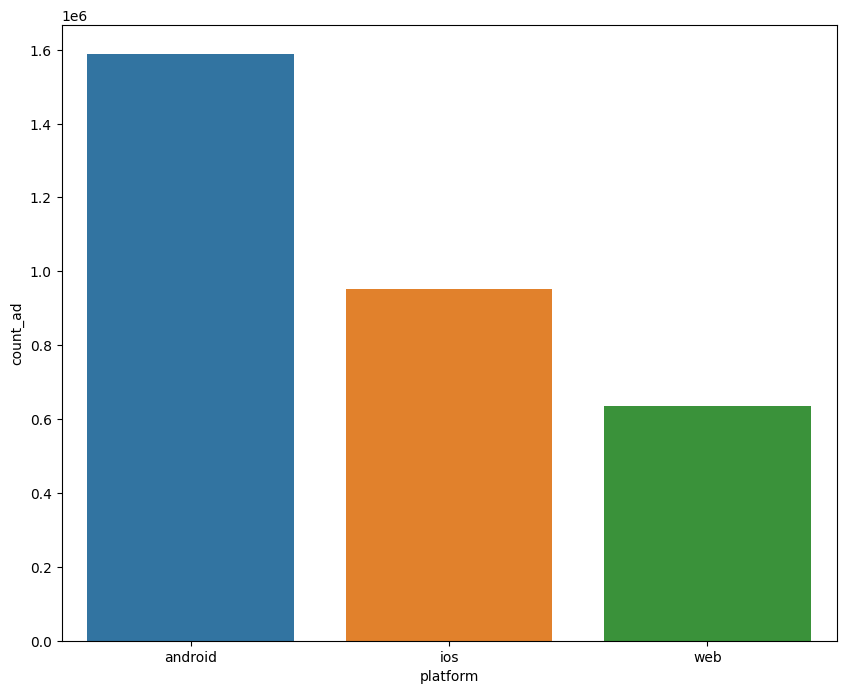

In [109]:
plt.figure(figsize=(10,8))
sns.barplot(data=top_platforms_ads, x='platform', y='count_ad')

Самая популярная платформа для размещения рекламных  объявлений - это android (1588211 объявлений ). Далее идет ios (953078) и web (635425).

In [110]:
views_platforms_ads = ads_data \
                        .query('event == "view"') \
                        .groupby('platform', as_index=False) \
                        .agg({'ad_id':'count'}) \
                        .rename(columns={'ad_id':'count_views'}) \
                        .sort_values('count_views',ascending=False)
views_platforms_ads

,platform,count_views
0,android,1295189
1,ios,776114
2,web,517948


In [111]:
#всего показов за весь период 
max_views = views_platforms_ads.count_views.sum()
max_views

2589251

In [112]:
views_platforms_ads = views_platforms_ads.assign(views_per = 100 * views_platforms_ads.count_views/max_views)
views_platforms_ads

,platform,count_views,views_per
0,android,1295189,50.021763
1,ios,776114,29.974460
2,web,517948,20.003777


Таким образом можно сделать вывод, что около 50 % показов приходится на платформу android, около 30 % на ios и 20 % на web платформу.

- Для финансового отчета нужно рассчитать наш заработок по дням. В какой день мы заработали больше всего? В какой меньше? Мы списываем с клиентов деньги, если произошел клик по CPC объявлению, и мы списываем деньги за каждый показ CPM объявления, если у CPM объявления цена - 200 рублей, то за один показ мы зарабатываем 200 / 1000.

In [113]:
#стоимость всех платных кликов 
cost_CPC_clicks = ads_data[(ads_data.event == 'click') & (ads_data.ad_cost_type == 'CPC')].ad_cost.sum()
cost_CPC_clicks

84810.0

In [114]:
#стоимость 1000 показов 
cost_CPM_views = ads_data[(ads_data.event == 'view') & (ads_data.ad_cost_type == 'CPM')].ad_cost.sum() / 1000
cost_CPM_views

497090.6778000003

In [117]:
#сумма всех платных взаимодействий
cost_ad = cost_CPC_clicks + cost_CPM_views
round(cost_ad,2)

581900.68

In [121]:
top_cost_CPC = ads_data[(ads_data.event == 'click') & (ads_data.ad_cost_type == 'CPC')] \
                .groupby('date', as_index=False) \
                .agg({'ad_cost': 'sum'}) \
                .rename(columns={'ad_cost':'sum_ad_cost'}) \

top_cost_CPC

,date,sum_ad_cost
0,2019-04-01,7036.9
1,2019-04-02,7663.7
2,2019-04-03,38597.2
3,2019-04-04,26878.0
4,2019-04-05,4381.2
5,2019-04-06,253.0


In [128]:
top_cost_CPC = top_cost_CPC.assign(only_date = top_cost_CPC.date.dt.date)
top_cost_CPC

,date,sum_ad_cost,only_date
0,2019-04-01,7036.9,2019-04-01
1,2019-04-02,7663.7,2019-04-02
2,2019-04-03,38597.2,2019-04-03
3,2019-04-04,26878.0,2019-04-04
4,2019-04-05,4381.2,2019-04-05
5,2019-04-06,253.0,2019-04-06


In [124]:
top_cost_CPC.date.dt.date

0    2019-04-01
1    2019-04-02
2    2019-04-03
3    2019-04-04
4    2019-04-05
5    2019-04-06
Name: date, dtype: object

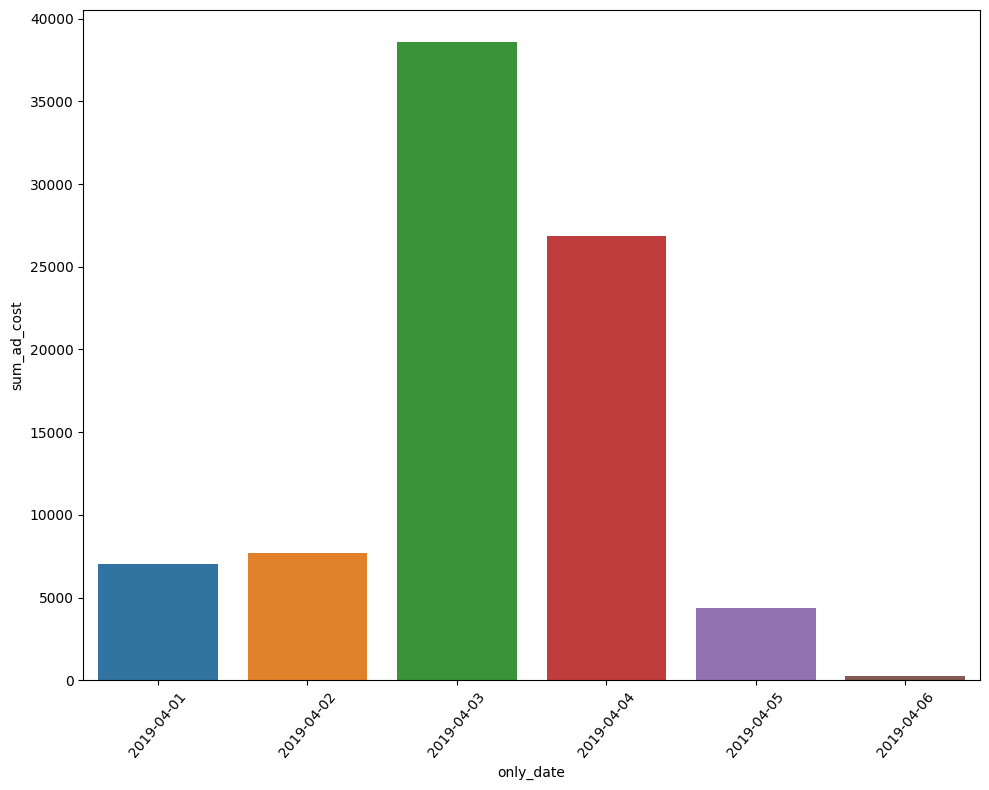

In [130]:
plt.figure(figsize=(10,8))
sns.barplot(data=top_cost_CPC, x='only_date', y='sum_ad_cost')
plt.xticks(rotation=50)
plt.tight_layout()

2019-04-03 заработок был максимальный и составлял 38597.2

2019-04-06 доход был минимальный, а именно 253.0


- А есть ли такие объявления, по которым сначала произошел клик, а только потом показ?

Чисто логически такого не должно происходить, ведь изначально происходит показ, а только потом возможен клик. Необходимо проверить наши данные на наличие таких багов.



In [138]:
bags_clicks_views = ads_data.groupby(['ad_id', 'event'], as_index=False) \
        .agg({'time':'min'}) \
        .pivot(index='ad_id',columns='event', values='time') \
        .reset_index() \
        .query('click < view')
bags_clicks_views

event,ad_id,click,view
27,16548,1.554336e+09,1.554336e+09
81,30939,1.554165e+09,1.554173e+09
138,40464,1.554164e+09,1.554164e+09
158,42007,1.554423e+09,1.554423e+09
185,44543,1.554336e+09,1.554337e+09
201,45436,1.554336e+09,1.554336e+09
324,119450,1.554336e+09,1.554336e+09


Список id объявлений, по которым сначала произошел клик, а только потом показ:

In [139]:
list_bags_ids = list(bags_clicks_views.ad_id)
list_bags_ids

[16548, 30939, 40464, 42007, 44543, 45436, 119450]

In [141]:
ads_data[ads_data.ad_id == 16548].sort_values('time')

,ad_id,time,event,date,ad_cost_type,has_video,client_union_id,campaign_union_id,platform,ad_cost,target_audience_count,user_id,full_date
512690,16548,1554336083,click,2019-04-04,CPM,0,722,16523,ios,196.6,53199,4133,2019-04-04 00:01:23
511482,16548,1554336278,view,2019-04-04,CPM,0,722,16523,android,196.6,53199,3736,2019-04-04 00:04:38
511439,16548,1554336352,view,2019-04-04,CPM,0,722,16523,android,196.6,53199,4968,2019-04-04 00:05:52
511438,16548,1554336352,view,2019-04-04,CPM,0,722,16523,ios,196.6,53199,4206,2019-04-04 00:05:52
511437,16548,1554336352,view,2019-04-04,CPM,0,722,16523,web,196.6,53199,3898,2019-04-04 00:05:52
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2056433,16548,1554422265,view,2019-04-05,CPM,0,722,16523,android,196.6,53199,3613,2019-04-04 23:57:45
2056432,16548,1554422265,view,2019-04-05,CPM,0,722,16523,android,196.6,53199,6044,2019-04-04 23:57:45
2056461,16548,1554422308,view,2019-04-05,CPM,0,722,16523,ios,196.6,53199,5831,2019-04-04 23:58:28
2056652,16548,1554422338,view,2019-04-05,CPM,0,722,16523,android,196.6,53199,2837,2019-04-04 23:58:58
